In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.linear_model import Ridge
from sklearn import datasets, ensemble
import statsmodels.api as sm
import seaborn as sns

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data = train_data[train_data.x != 0]
train_data = train_data[train_data.y != 0]
train_data = train_data[train_data.z != 0]

In [5]:
train_data["volume"] = train_data['x'] * train_data['y'] * train_data['z'] * 2 / 3
test_data["volume"] = test_data['x'] * test_data['y'] * test_data['z'] * 2 / 3

In [6]:
train_data.isnull().sum().any()

False

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43135 entries, 0 to 43151
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43135 non-null  int64  
 1   carat    43135 non-null  float64
 2   cut      43135 non-null  object 
 3   color    43135 non-null  object 
 4   clarity  43135 non-null  object 
 5   depth    43135 non-null  float64
 6   table    43135 non-null  float64
 7   price    43135 non-null  int64  
 8   x        43135 non-null  float64
 9   y        43135 non-null  float64
 10  z        43135 non-null  float64
 11  volume   43135 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.3+ MB


<ipython-input-8-6d8d3d5a89a2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, linewidths=.5, ax=ax)


<Axes: >

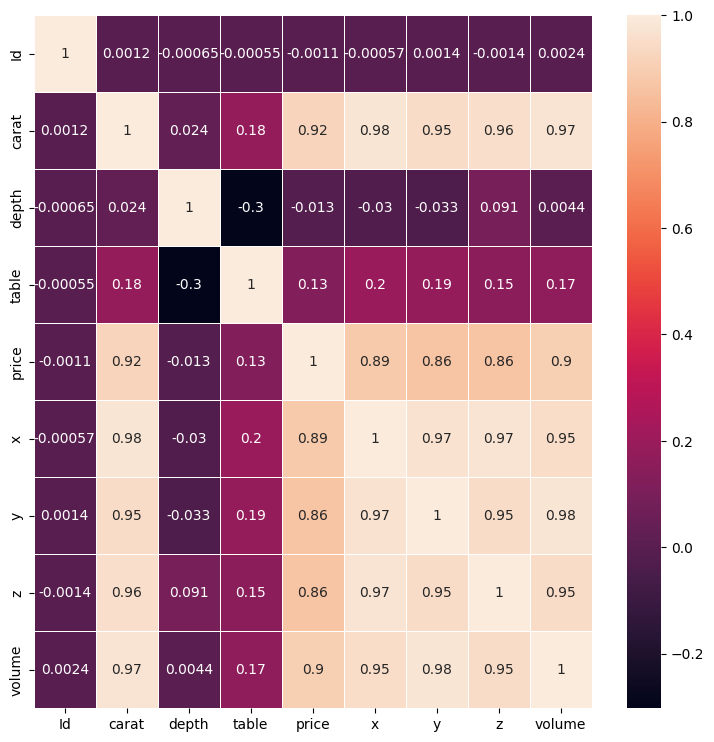

In [8]:
fig, ax = plt.subplots(figsize=(9 ,9
))         # Sample figsize in inches
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, ax=ax)

In [77]:
encoder = OneHotEncoder(handle_unknown='ignore')
#cut encoding
#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(train_data[['cut']]).toarray())

#merge one-hot encoded columns back with original DataFrame
train_data_v1 = train_data.join(encoder_df)

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.transform(test_data[['cut']]).toarray())

#merge one-hot encoded columns back with original DataFrame
test_data_v1 = test_data.join(encoder_df)

In [78]:
#clarity encoding
#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(train_data[['clarity']]).toarray())

#merge one-hot encoded columns back with original DataFrame
train_data_v2 = train_data.join(encoder_df)

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.transform(test_data[['clarity']]).toarray())

#merge one-hot encoded columns back with original DataFrame
test_data_v2 = test_data.join(encoder_df)

In [79]:
train_data_v2.isnull().sum()

Id          0
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           0
y           0
z           0
volume      0
0          17
1          17
2          17
3          17
4          17
5          17
6          17
7          17
dtype: int64

In [81]:
train_data_v2.dropna(inplace=True)

In [82]:
train_data_v2.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
volume     0
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
dtype: int64

In [83]:
#dropping unnecessary columns
#drop 'team' column
train_data_v3 = train_data_v2.drop(
    ['cut', 'clarity', 'x', 'y', 'z', 'color', 'depth', 'Id'], axis=1, inplace=False)
test_data_v3 = test_data_v2.drop(
    ['cut', 'clarity', 'x', 'y', 'z', 'color', 'depth', 'Id'], axis=1, inplace=False)

In [84]:
train_data_v3.describe()

,carat,table,price,volume,0,1,2,3,4,5,6,7
count,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000
mean,0.797587,57.458175,3927.813025,86.603616,0.013962,0.033374,0.241732,0.172132,0.150077,0.227724,0.067327,0.093673
std,0.473277,2.233471,3983.100236,52.392660,0.117333,0.179612,0.428138,0.377500,0.357151,0.419368,0.250590,0.291377
min,0.200000,43.000000,326.000000,21.138656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,947.000000,43.446717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,2401.000000,76.567887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,5311.000000,113.897257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,95.000000,18823.000000,2560.398707,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
train_data_v3.describe()

,carat,table,price,volume,0,1,2,3,4,5,6,7
count,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000,43118.000000
mean,0.797587,57.458175,3927.813025,86.603616,0.013962,0.033374,0.241732,0.172132,0.150077,0.227724,0.067327,0.093673
std,0.473277,2.233471,3983.100236,52.392660,0.117333,0.179612,0.428138,0.377500,0.357151,0.419368,0.250590,0.291377
min,0.200000,43.000000,326.000000,21.138656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,947.000000,43.446717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,2401.000000,76.567887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,5311.000000,113.897257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,95.000000,18823.000000,2560.398707,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
len(train_data_v3)

42810

<Axes: xlabel='table', ylabel='Density'>

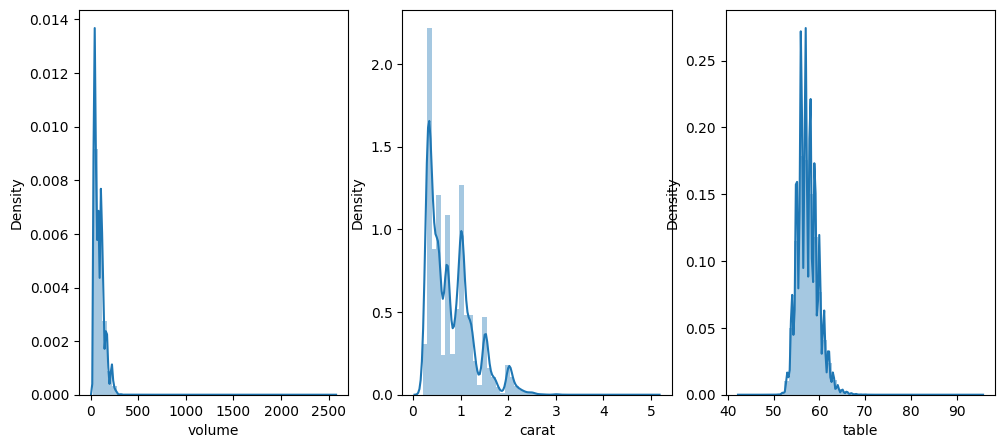

In [86]:
#now lets tend to the outliers
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.distplot(train_data_v3['volume'])
plt.subplot(1,4,2)
sns.distplot(train_data_v3['carat'])
plt.subplot(1,4,3)
sns.distplot(train_data_v3['table'])


In [87]:
print("Highest allowed for volume",str(train_data_v3['volume'].mean() + 3*train_data_v3['volume'].std()))


Highest allowed for volume 243.78159748204467


In [88]:
print("Highest allowed for carat",str(train_data_v3['carat'].mean() + 3*train_data_v3['carat'].std()))

Highest allowed for carat 2.217418578176636


In [89]:
print("Highest allowed for volume",str(train_data_v3['table'].mean() + 3*train_data_v3['table'].std()))
print("Lowest allowed for volume",str(train_data_v3['table'].mean() - 3*train_data_v3['table'].std()))

Highest allowed for volume 64.15858800396411
Lowest allowed for volume 50.7577624761138


In [90]:
outliers = train_data_v3[(train_data_v3['volume'] > 243.8) | (train_data_v3['carat'] > 2.21)]

In [91]:
train_data_v3 = train_data_v3[(train_data_v3['volume'] < 242) | (train_data_v3['carat'] < 2.21)]
train_data_v3 = train_data_v3[(train_data_v3['table'] < 64) | (train_data_v3['table'] > 50)]
train_data_v3.describe()

,carat,table,price,volume,0,1,2,3,4,5,6,7
count,42810.000000,42810.000000,42810.000000,42810.000000,42810.000000,42810.000000,42810.000000,42810.000000,42810.000000,42810.000000,42810.000000,42810.000000
mean,0.785479,57.453488,3845.301845,85.301461,0.013969,0.033240,0.241439,0.172156,0.150385,0.227751,0.067251,0.093810
std,0.452024,2.232053,3869.370956,50.198113,0.117362,0.179264,0.427961,0.377520,0.357453,0.419386,0.250458,0.291567
min,0.200000,43.000000,326.000000,21.138656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,945.000000,43.295616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,2379.000000,76.324248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,5233.000000,113.124241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.320000,95.000000,18818.000000,2560.398707,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
train_data_v3.isnull().sum().any()

False

In [93]:
Y_train = train_data_v3['price'].values
X_train = train_data_v3.drop(['price'],axis = 1).values
X_test = test_data_v3.values

In [94]:
test_data_v3.describe()

,carat,table,volume,0,1,2,3,4,5,6,7
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.798279,57.452531,86.557864,0.012514,0.032258,0.244438,0.163330,0.157212,0.225621,0.069614,0.095013
std,0.475700,2.236933,51.150575,0.111169,0.176693,0.429774,0.369683,0.364017,0.418010,0.254508,0.293246
min,0.200000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,43.470080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,76.527600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,113.890907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.500000,73.000000,465.636864,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
train_data_v3.head()

,carat,table,price,volume,0,1,2,3,4,5,6,7
0,1.06,57.0,4270,117.655560,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.51,58.0,15164,164.643864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.32,56.0,828,35.295582,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.53,56.0,1577,57.615228,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.70,57.0,2596,76.876800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [129]:
#normalizing data
minmaxScaler = MinMaxScaler().fit(X_train)
X_train_normalized = minmaxScaler.transform(X_train)
X_test_normalized = minmaxScaler.transform(X_test)

In [97]:
X_train_normalized

array([[  1.06      ,  57.        , 117.65556   , ...,   0.        ,
          0.        ,   0.        ],
       [  1.51      ,  58.        , 164.643864  , ...,   0.        ,
          0.        ,   1.        ],
       [  0.32      ,  56.        ,  35.295582  , ...,   1.        ,
          0.        ,   0.        ],
       ...,
       [  0.81      ,  58.        ,  86.64433067, ...,   0.        ,
          1.        ,   0.        ],
       [  0.4       ,  53.        ,  44.33586667, ...,   0.        ,
          0.        ,   0.        ],
       [  0.46      ,  61.9       ,  50.97174133, ...,   1.        ,
          0.        ,   0.        ]])

In [98]:
#linear regression
linearRegression = linear_model.LinearRegression()
linearRegression.fit(X_train_normalized, Y_train)

LinearRegression()

In [99]:
linearRegression.score(X_train_normalized, Y_train)

0.8502361579920876

In [100]:
pricing_predictions = linearRegression.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1497.403284895108


In [101]:
scores = cross_val_score(linearRegression, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv

array([0.92429326, 0.92035889, 0.92285939, 0.92057642, 0.92244876,
       0.91842357, 0.92108776, 0.92259602, 0.89255709, 0.92607794])

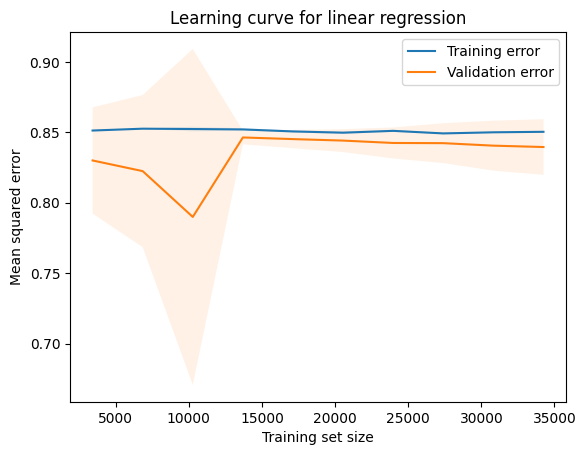

In [102]:
# Define different training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(linearRegression, X_train_normalized, Y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation error')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve for linear regression')
plt.legend()
plt.show()

In [103]:
#now we try something that has regularization
lassoRegression = Lasso()
lassoRegression.fit(X_train_normalized, Y_train)

Lasso()

In [104]:
pricing_predictions = lassoRegression.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1497.4561646454163


In [105]:
scores = cross_val_score(lassoRegression, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv

array([0.92433343, 0.92040823, 0.92286006, 0.9206114 , 0.92249082,
       0.91850486, 0.9211259 , 0.92260571, 0.87758626, 0.92608307])

In [106]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
gscv = GridSearchCV( \
    lassoRegression, param_grid, cv=10)
results = gscv.fit(X_train_normalized, Y_train)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: 0.84465
Config: {'alpha': 0.1}


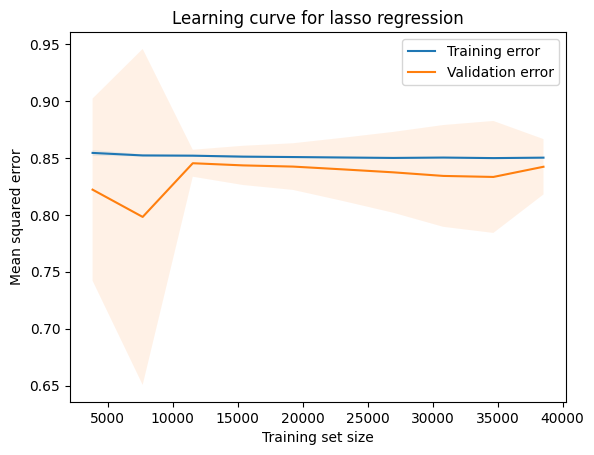

In [107]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(lassoRegression, X_train_normalized, Y_train, train_sizes=train_sizes, cv=10)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation error')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve for lasso regression')
plt.legend()
plt.show()

In [108]:
#another regression model with regularization
ridgeRegression = Ridge(alpha=0.1, solver='svd', max_iter=100)
ridgeRegression.fit(X_train_normalized, Y_train)

Ridge(alpha=0.1, max_iter=100, solver='svd')

In [109]:
pricing_predictions = ridgeRegression.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1497.403294065386


In [110]:
scores = cross_val_score(ridgeRegression, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv


array([0.92429325, 0.92035946, 0.92285944, 0.92057672, 0.92244904,
       0.91842436, 0.9210885 , 0.92259641, 0.89236187, 0.92607834])

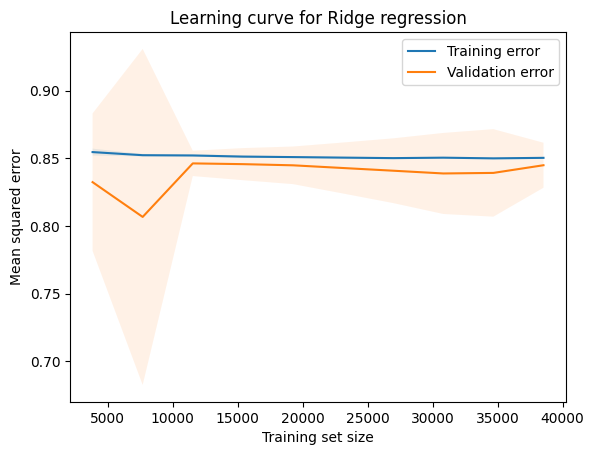

In [111]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(ridgeRegression, X_train_normalized, Y_train, train_sizes=train_sizes, cv=10)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation error')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve for Ridge regression')
plt.legend()
plt.show()

In [112]:
#Random forest tree
Reg_forest = RandomForestRegressor()
Reg_forest.fit(X_train_normalized, Y_train)

RandomForestRegressor()

In [113]:
Reg_forest.score(X_train_normalized, Y_train)

0.9817974800853756

In [114]:
pricing_predictions = Reg_forest.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

522.0367202854873


In [115]:
scores = cross_val_score(Reg_forest, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv

array([0.93302404, 0.93172567, 0.93449908, 0.92991674, 0.93400861,
       0.92367689, 0.93133103, 0.93603784, 0.93592312, 0.93817366])

In [116]:
#Decision Tree Regressor
Tree_Reg = DecisionTreeRegressor()
Tree_Reg.fit(X_train_normalized, Y_train)

DecisionTreeRegressor()

In [117]:
Tree_Reg.score(X_train_normalized, Y_train)

0.9994879506534299

In [118]:
pricing_predictions = Tree_Reg.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

87.55706662906275


In [119]:
scores = cross_val_score(Tree_Reg, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv

array([0.88023922, 0.87679607, 0.88172828, 0.87105999, 0.8872146 ,
       0.85591225, 0.87783198, 0.88373602, 0.88666797, 0.89055743])

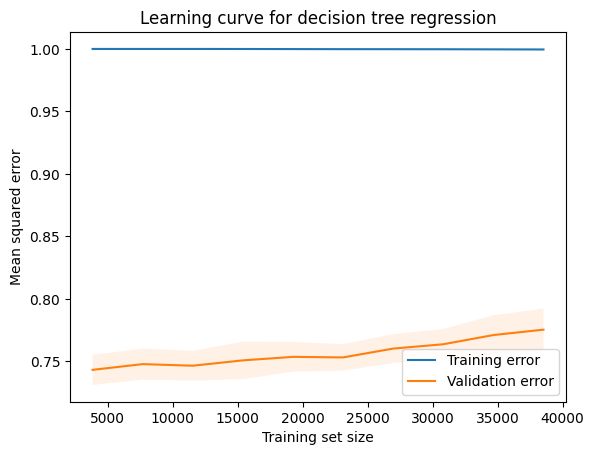

In [121]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(Tree_Reg, X_train_normalized, Y_train, train_sizes=train_sizes, cv=10)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation error')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve for decision tree regression')
plt.legend()
plt.show()




In [ ]:
# Define the parameter grid for tuning
param_grid = {'alpha': [0.1, 1, 10, 100],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
              'positive': [True, False],
              'max_iter': [100, 200, None]}
grid_search = GridSearchCV(estimator=ridgeRegression, param_grid=param_grid, cv=10)
grid_search.fit(X_train_normalized, Y_train)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'alpha': 0.1, 'max_iter': 100, 'positive': False, 'solver': 'svd'}
Best score: 0.8939970441974611


In [150]:
params = {
    "n_estimators": 600,
    "max_depth": 7,
    "min_samples_split": 4,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train_normalized, Y_train)

pricing_predictions = reg.predict(X_train_normalized)

lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1250.7270949119268

In [151]:
reg.score(X_train_normalized, Y_train)

0.8955148606603909

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000],
    "loss": ["squared_error"],
}

# Create an instance of the XGBRegressor model
# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_normalized, Y_train)

# Print the best hyperparameters and corresponding score
print('Best hyperparameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters:  {'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 7, 'n_estimators': 1000}
Best score:  0.9389065039492813


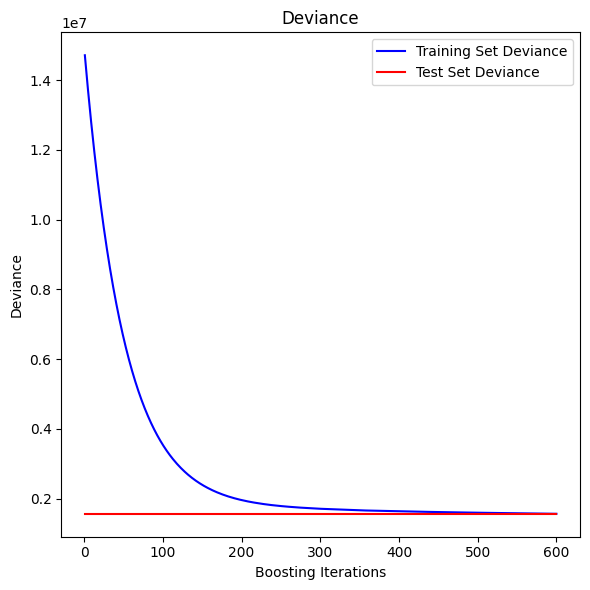

In [152]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_train_normalized)):
    test_score[i] = mean_squared_error(Y_train, pricing_predictions)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [158]:
predictions = reg.predict(X_test_normalized)

In [159]:
submission = test_data[["Id"]]

In [160]:
submission['price'] = predictions

In [161]:
submission.head()

,Id,price
0,1,787.388048
1,2,2638.518577
2,3,1060.773418
3,4,3034.527111
4,5,983.930402


In [163]:
submission.to_csv("submissionridge44.csv", index=None)